In [3]:
import sqlite3

conn = sqlite3.connect("sales_data.db")

cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

sample_data = [
    ('Product A', 10, 15.00),
    ('Product B', 5, 20.00),
    ('Product A', 3, 15.00),
    ('Product C', 7, 30.00),
    ('Product B', 2, 20.00)
]

cursor.executemany( sample_data)

conn.commit()
conn.close()


     product  total_qty  revenue
0  Product A         13    195.0
1  Product B          7    140.0
2  Product C          7    210.0


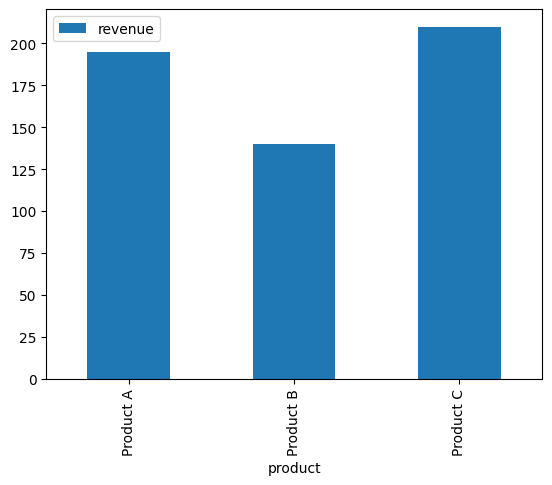

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

# Define the SQL query to get total quantity sold and total revenue
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

print(df)

df.plot(kind='bar', x='product', y='revenue')
 
plt.savefig("sales_chart.png")


conn.close()